In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
import numpy as np
import my_functions as my
import gsw
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import my_plot_params

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=1)  # every month
week = mdates.WeekdayLocator(byweekday=mdates.MO, interval=1)
weeks = mdates.WeekdayLocator(byweekday=mdates.MO, interval=3)

yearsFmt = mdates.DateFormatter("%d/%m")

mnthFmt = mdates.DateFormatter("%B")

lightblue = '#5499c7'
blue      = '#21618c'
orange    = '#f39c12'
green     = '#27ae60'
red       = '#cb4335'

In [3]:
dat_saz = xr.open_dataset('../data/dat_saz_6H.nc')
dat_pfz = xr.open_dataset('../data/dat_pfz_6H.nc')
dat_miz = xr.open_dataset('../data/dat_miz_6H.nc')

for i, dat in enumerate([dat_saz, dat_pfz, dat_miz]):
    
    dat['tau']=(('time'), np.sqrt(dat['taux']**2 + dat['tauy']**2).data)

dat_saz = dat_saz.resample(time='1D', loffset='12H').mean()
dat_pfz = dat_pfz.resample(time='1D', loffset='12H').mean()
dat_miz = dat_miz.resample(time='1D', loffset='12H').mean()

In [4]:
import matplotlib.dates as mdates

day0=mdates.date2num(np.datetime64('2019-01-01 00:00:00'))

for dat in [dat_saz, dat_pfz, dat_miz]:
    
    dat['dayofyear']=mdates.date2num(dat.time)-day0

In [5]:
print(dat_saz.tau.mean().values)
print(dat_pfz.tau.mean().values)
print(dat_miz.tau.mean().values)

0.1160677344955656
0.1452062997902746
0.08553490961106044


In [6]:
0.1160677344955656/0.1452062997902746

0.7993298821277408

In [7]:
kappa=0.4
z=10
sp=dat_saz['u10']
tol=0.0001

a = np.log(z / 10.) / kappa  # Log-layer correction factor.
u10o = np.zeros(sp.shape)
cd = 1.15e-3 * np.ones(sp.shape)
u10 = sp / (1 + a * np.sqrt(cd))
ii = np.abs(u10 - u10o) > tol

In [8]:
u10o = u10
cd = (4.9e-4 + 6.5e-5 * u10o)  # Compute cd(u10).
cd[u10o < 10.15385] = 1.15e-3

#### Plot the figure 

In [9]:
from matplotlib.ticker import MultipleLocator

majorLocator = MultipleLocator(10)
minorLocator = MultipleLocator(5)

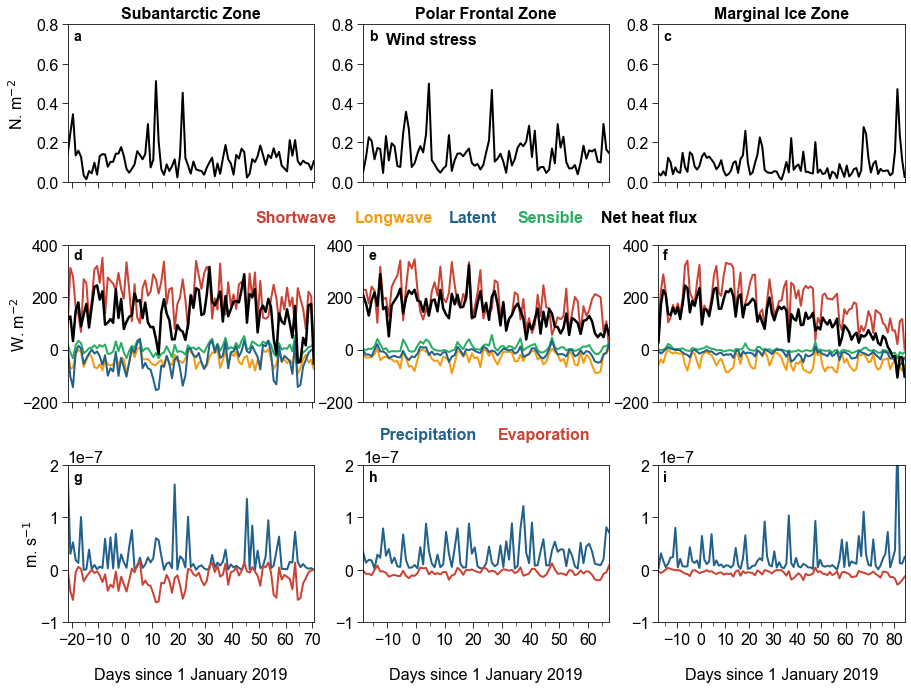

In [15]:
fig,ax=plt.subplots(3,3, figsize=[15, 11])
fig.subplots_adjust(hspace=0.4)

from matplotlib.ticker import MultipleLocator

majorLocator = MultipleLocator(10)
minorLocator = MultipleLocator(5)

for i in range(3):
    for ii in range(3):
        ax[ii,i].xaxis.set_major_locator(majorLocator)
        ax[ii,i].xaxis.set_minor_locator(minorLocator)
        
        if ii<2:
            ax[ii,i].set_xticklabels([])

for i, dat in enumerate([dat_saz, dat_pfz, dat_miz]):
    
    ax[0,i].plot(dat.dayofyear, dat.tau, c='k')

    ax[0,i].set_xlim(dat.dayofyear[0], dat.dayofyear[-1])
    ax[0,i].set_ylim(0, 0.8)
    
    
for i, dat in enumerate([dat_saz, dat_pfz, dat_miz]):
    
    ax[1,i].plot(dat.dayofyear, dat.ssr,  c=red)
    ax[1,i].plot(dat.dayofyear, dat.str,  c=orange)
    ax[1,i].plot(dat.dayofyear, dat.sshf, c=green)
    ax[1,i].plot(dat.dayofyear, dat.slhf, c=blue)
    ax[1,i].plot(dat.dayofyear, dat.qnet, lw=2.5, c='k')

    ax[1,i].set_xlim(dat.dayofyear[0], dat.dayofyear[-1])
    ax[1,i].set_ylim(-200, 400)
    
    
for i, dat in enumerate([dat_saz, dat_pfz, dat_miz]):
    
    ax[2,i].plot(dat.dayofyear, dat.tp, c=blue)
    ax[2,i].plot(dat.dayofyear, dat.e, c=red)

    ax[2,i].set_xlim(dat.dayofyear[0], dat.dayofyear[-1])
    ax[2,i].set_ylim(-1e-7, 2e-7)
        
ax[0,1].text(dat_pfz.dayofyear[8], 0.7, 'Wind stress', c='k', fontweight='bold')

yloc = 485
ax[1,0].text(dat_saz.dayofyear[70],  yloc, 'Shortwave', c=red, fontweight='bold')
ax[1,1].text(dat_pfz.dayofyear[0]-3, yloc, 'Longwave', c=orange, fontweight='bold')
ax[1,1].text(dat_pfz.dayofyear[54],  yloc, 'Sensible',      c=green, fontweight='bold')
ax[1,1].text(dat_pfz.dayofyear[30],  yloc, 'Latent',        c=blue, fontweight='bold')
ax[1,1].text(dat_pfz.dayofyear[83],  yloc, 'Net heat flux', c='k', fontweight='bold')


ax[2,1].text(dat_pfz.dayofyear[47], 2.5e-7, 'Evaporation', c=red, fontweight='bold')
ax[2,1].text(dat_pfz.dayofyear[6],  2.5e-7, 'Precipitation', c=blue, fontweight='bold')

ax[0,0].set_ylabel('N. m$^{-2}$', labelpad=10)
ax[1,0].set_ylabel('W. m$^{-2}$', labelpad=-6)
ax[2,0].set_ylabel('m. s$^{-1}$', labelpad=-1)

props=dict(fontsize=16, fontweight='bold')

ax[0,0].set_title('Subantarctic Zone' , **props)
ax[0,1].set_title('Polar Frontal Zone', **props)
ax[0,2].set_title('Marginal Ice Zone' , **props)

ax[0,0].text(dat_saz.dayofyear[2], 0.72, 'a', fontweight='bold', fontsize=14)
ax[0,1].text(dat_pfz.dayofyear[2], 0.72, 'b', fontweight='bold', fontsize=14)
ax[0,2].text(dat_miz.dayofyear[2], 0.72, 'c', fontweight='bold', fontsize=14)

ax[1,0].text(dat_saz.dayofyear[2], 345, 'd', fontweight='bold', fontsize=14)
ax[1,1].text(dat_pfz.dayofyear[2], 345, 'e', fontweight='bold', fontsize=14)
ax[1,2].text(dat_miz.dayofyear[2], 345, 'f', fontweight='bold', fontsize=14)

ax[2,0].text(dat_saz.dayofyear[2], 1.7e-7, 'g', fontweight='bold', fontsize=14)
ax[2,1].text(dat_pfz.dayofyear[2], 1.7e-7, 'h', fontweight='bold', fontsize=14)
ax[2,2].text(dat_miz.dayofyear[2], 1.7e-7, 'i', fontweight='bold', fontsize=14)

ax[2,0].set_xlabel('Days since 1 January 2019', labelpad=20)
ax[2,1].set_xlabel('Days since 1 January 2019', labelpad=20)
ax[2,2].set_xlabel('Days since 1 January 2019', labelpad=20)


plt.savefig('../figs_submission3/fig4.png', dpi=300)

/Users/marcel/opt/anaconda3/envs/duplessis2021_JGR/lib/python3.9/site-packages/windrose/windrose.py:572: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch = mpl.patches.Rectangle(


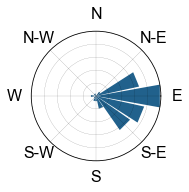

In [4]:
from windrose import WindroseAxes

fig = plt.figure(figsize=[2, 2])

rect=[0.05,0.05,0.9,0.9]

wr=WindroseAxes(fig, rect)

fig.add_axes(wr)
wr.bar(dat_saz['wind_dir'], dat_saz['wind_dir']*0, 
       opening=0.9, 
       normed=True, 
       edgecolor='w', lw=0, color=blue, 
       zorder=10
      )
wr.yaxis.set_ticklabels([])
plt.grid(linewidth=0.1, linestyle='-', zorder=0, color='k')

plt.savefig('../figs_submission2/fig4_saz_windrose.png', dpi=300)

/Users/marcel/opt/anaconda3/envs/duplessis2021_JGR/lib/python3.9/site-packages/windrose/windrose.py:572: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch = mpl.patches.Rectangle(


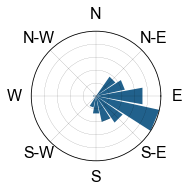

In [5]:
from windrose import WindroseAxes

fig = plt.figure(figsize=[2, 2])

rect=[0.05,0.05,0.9,0.9]

wr=WindroseAxes(fig, rect)

fig.add_axes(wr)
wr.bar(dat_pfz['wind_dir'], dat_pfz['wind_dir']*0, 
       opening=0.9, 
       normed=True, 
       edgecolor='w', lw=0, color=blue, 
       zorder=10
      )
wr.yaxis.set_ticklabels([])
plt.grid(linewidth=0.1, linestyle='-', zorder=0, color='k')

plt.savefig('../figs_submission2/fig4_pfz_windrose.png', dpi=300)

/Users/marcel/opt/anaconda3/envs/duplessis2021_JGR/lib/python3.9/site-packages/windrose/windrose.py:572: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch = mpl.patches.Rectangle(


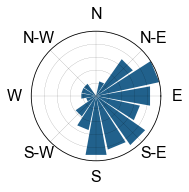

In [6]:
from windrose import WindroseAxes

fig = plt.figure(figsize=[2, 2])

rect=[0.05,0.05,0.9,0.9]

wr=WindroseAxes(fig, rect)

fig.add_axes(wr)
wr.bar(dat_miz['wind_dir'], dat_miz['wind_dir']*0, 
       opening=0.9, 
       normed=True, 
       edgecolor='w', lw=0, color=blue, 
       zorder=10
      )
wr.yaxis.set_ticklabels([])
plt.grid(linewidth=0.1, linestyle='-', zorder=0, color='k')

plt.savefig('../figs_submission2/fig4_miz_windrose.png', dpi=300)

In [7]:
dat_saz.to_netcdf('../data/dat_saz_1D.nc')
dat_pfz.to_netcdf('../data/dat_pfz_1D.nc')
dat_miz.to_netcdf('../data/dat_miz_1D.nc')